##**EE670 | Python Assignment #1**



>### K Chaitanya Sadhan
>### 231040059

*Question 1*



Text(0, 0.5, 'SER')

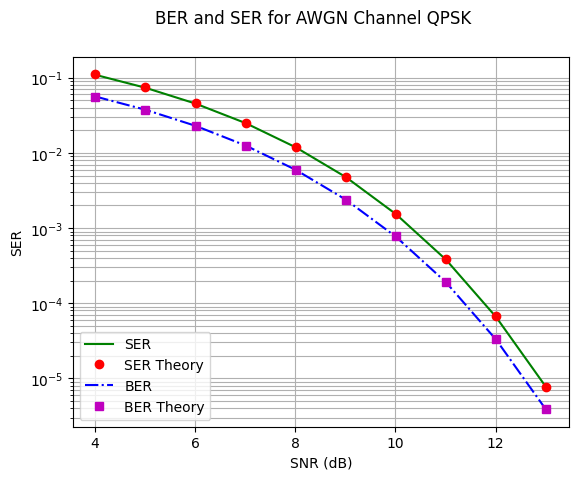

In [ ]:
#importing necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as nr
from scipy.stats import norm

#defining Q-function
def Q(x):
    return 1-norm.cdf(x);

#each block consists of 1000 symbols
blockLength = 1000;

#10000 such blocks are there, summing up to 10^7 symbols
#the total number of bits are 10^7 * 4

nBlocks=10000;

#energy per bit in dB
EbdB = np.arange(1.0,10.1);

#energy per bit in linear scale.
Eb = 10**(EbdB/10);

#noise power as 1
No = 1;

#calculating SNR in Linear Scale followed by dB
SNR = 2*Eb/No;
SNRdB = 10*np.log10(SNR);
SER = np.zeros(len(EbdB));
BER = np.zeros(len(EbdB));


for blk in range(nBlocks):
  #generating inphase bits.
  BitsI = nr.randint(2, size = blockLength)
  #generating Quadrature bits.
  BitsQ = nr.randint(2, size = blockLength)
  #generating QPSK symbol
  Sym = (2*BitsI - 1) + 1j*(2*BitsQ - 1)

  #complex gaussian noise sample with 0 mean and variance No = 1.
  noise = nr.normal(0.0, np.sqrt(No/2), blockLength) + 1j*(nr.normal(0.0, np.sqrt(No/2), blockLength))

  for k in range(len(EbdB)):
    #transmit symbol
    TxSym = np.sqrt(Eb[k])*Sym
    #received symbol added with noise
    RxSym = TxSym + noise
    #Decoding the received bits
    DecBitsI = (np.real(RxSym)>0)
    DecBitsQ = (np.imag(RxSym)>0)

    #calculating the symbol error rate: if any of the bit is in error i.e., the whole symbol is in error.
    SER[k] = SER[k] + np.sum(np.logical_or(DecBitsI != BitsI, DecBitsQ != BitsQ))

    #calculating the bit error rate: summing the individual error bits
    BER[k] = BER[k] + np.sum(DecBitsI != BitsI) + np.sum(DecBitsQ != BitsQ)


#calculating Average SER and BER.
SER = SER/blockLength/nBlocks;
BER = BER/blockLength/nBlocks/2;
plt.yscale('log')
plt.plot(SNRdB, SER,'g-');

#calculating and plotting the theoritical SER.
plt.plot(SNRdB, 2*Q(np.sqrt(SNR)),'ro');


plt.plot(SNRdB, BER,'b-.');

#calculating and plotting the theoritical BER.
plt.plot(SNRdB, Q(np.sqrt(SNR)),'ms');
plt.grid(1,which='both')
plt.suptitle('BER and SER for AWGN Channel QPSK')
plt.legend(["SER","SER Theory","BER","BER Theory"], loc ="lower left");
plt.xlabel('SNR (dB)')
plt.ylabel('SER')

*Question 2*

Text(0, 0.5, 'BER')

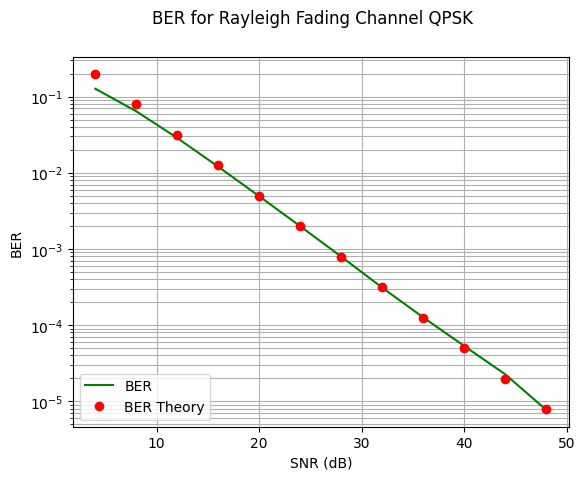

In [ ]:
#importing the required libraries.
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as nr

blockLength = 1000; # Number of symbols in block
nBlocks = 50000; # Number of blocks
EbdB = np.arange(1.0,45.1,4.0); # Energy per bit Eb in dB
Eb = 10**(EbdB/10); # Energy per bit Eb
No = 1; # Total noise power No
SNR = 2*Eb/No; # Signal-to-noise power ratio
SNRdB = 10*np.log10(SNR); # SNR in dB
BER = np.zeros(len(EbdB)); # Bit-error rate
BERt = np.zeros(len(EbdB)); # Bit-error rate from formula


for blk in range(nBlocks):
    # Rayleigh fading channel coefficient with average power unity
    h = (nr.normal(0.0, 1.0, 1)+1j*nr.normal(0.0, 1.0, 1))/np.sqrt(2);
    # Complex Gaussian noise, I/Q power No/2
    noise = nr.normal(0.0, np.sqrt(No/2), blockLength)+1j*nr.normal(0.0, np.sqrt(No/2), blockLength);
    BitsI = nr.randint(2,size=blockLength); # I channel bits
    BitsQ = nr.randint(2,size=blockLength); # Q channel bits
    Sym = (2*BitsI-1)+1j*(2*BitsQ-1); # Complex symbols each power 2Eb

    for k in range(len(SNRdB)):
        TxSym = np.sqrt(Eb[k])*Sym #transmitting symbol
        RxSym = h*TxSym + noise #recieved symbol with the effect of channel and noise.
        EqSym = RxSym/h #equalized received symbol
        DecBitsI = (np.real(EqSym)>0) #decoding inphase bits.
        DecBitsQ = (np.imag(EqSym)>0) #Decoding Quadrature bits.
        #calculating BER
        BER[k] = BER[k] + np.sum(DecBitsI != BitsI) + np.sum(DecBitsQ != BitsQ)





BER = BER/blockLength/nBlocks/2; # Evaluating average bit error rate
BERt = 1/2/SNR; # Evaluating bit error rate from formula

# Plotting bit-error rate from simulation and formula
plt.yscale('log')
plt.plot(SNRdB, BER,'g-');
plt.plot(SNRdB, BERt,'ro');
plt.grid(1,which='both')
plt.suptitle('BER for Rayleigh Fading Channel QPSK')
plt.legend(["BER","BER Theory"], loc ="lower left");
plt.xlabel('SNR (dB)')
plt.ylabel('BER')